<span style="color:cyan; font-size:3em; font-family:Papyrus"> 
<div align="center"><b>Pregunta 3</b></div>
</span> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import feather

data = pd.read_feather('./data/BIG_MART_SALES_PREDICTION.feather')
data.sample(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
589,NCU41,18.85,LF,0.052055,Health and Hygiene,189.1846,OUT046,1997,Small,Tier 1,Supermarket Type1,2101.9306
7486,FDM57,11.65,Regular,0.076003,Snack Foods,83.4908,OUT045,2002,None,Tier 2,Supermarket Type1,503.3448
4742,FDP09,19.75,Low Fat,0.033943,Snack Foods,213.5902,OUT049,1999,Medium,Tier 1,Supermarket Type1,4460.1942


# Preprocesamiento

## 1. Considere las columnas con datos faltantes, muestre y almacene en disco duro un diagrama de barras que el numero de datos faltantes para esas columnas.

In [2]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

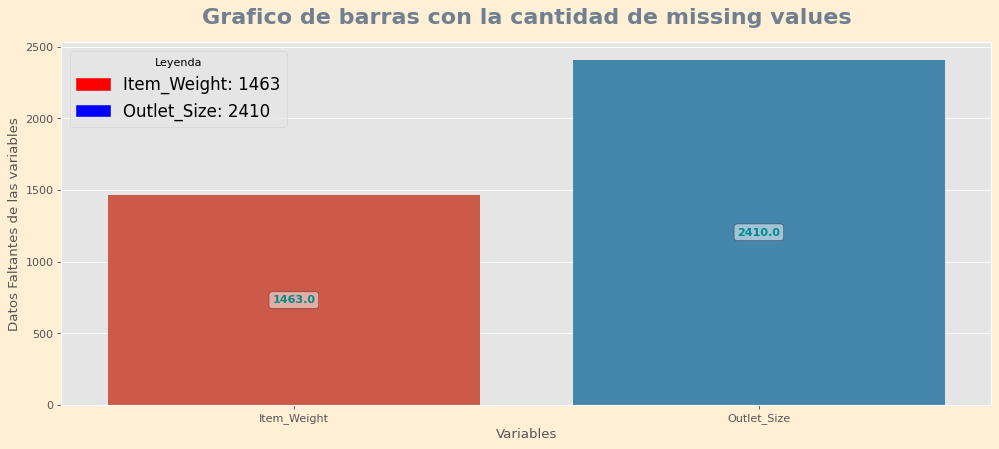

In [100]:
import colorsys
import matplotlib.patches as mpatches

data_variables_with_missing_values = data[['Item_Weight', 'Outlet_Size']]

fig = plt.figure(figsize=(15,6), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
ax = sns.barplot(
    x=data_variables_with_missing_values.isnull().sum().index, 
    y=data_variables_with_missing_values.isnull().sum().values,
    )
plt.title('Grafico de barras con la cantidad de missing values', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Variables')
plt.ylabel('Datos Faltantes de las variables')
plt.xticks(rotation=0)
for p in ax.patches:
   ax.annotate(
      text='{:.1f}'.format(p.get_height()), 
      xy=(p.get_x() + p.get_width() / 2, p.get_height() / 2),  
      ha='center', va='center',
      rotation=0, color='darkcyan', 
      fontweight='bold',
      bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.5))

item_weight = mpatches.Patch(color='red', label='Item_Weight')
outlet_size = mpatches.Patch(color='blue', label='Outlet_Size')

plt.legend(
    labels=[
        f'Item_Weight: {data_variables_with_missing_values.isnull().sum().values[0]}', 
        f'Outlet_Size: {data_variables_with_missing_values.isnull().sum().values[1]}'],
    loc='upper left', 
    fontsize=15, 
    frameon=True, 
    title='Leyenda', 
    handles=[ item_weight, outlet_size])
      

# save figure
plt.savefig('./imgs/Columnas_con_datos_faltantes_de_la_data_BIG_MART_SALES_PREDICTION.png',
                bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
NA = mpatches.Patch(color='blue', label='North America')
EU = mpatches.Patch(color='green', label='Europe')
AP = mpatches.Patch(color='red', label='Asia/Pacific')
SA = mpatches.Patch(color='yellow', label='South America')
plt.legend(handles=[NA,EU,AP,SA], loc=2)

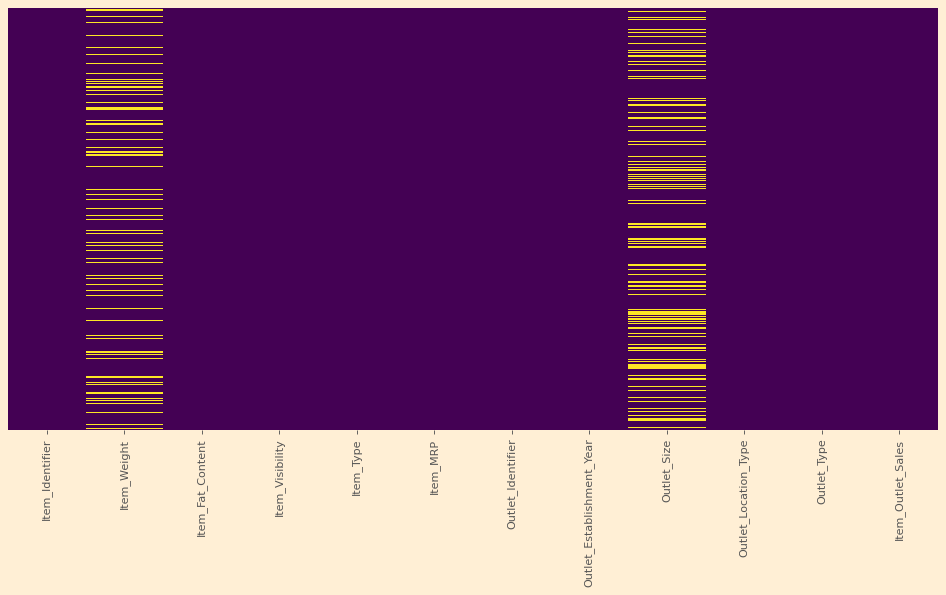

In [4]:
fig = plt.figure(figsize=(15,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

## 2. A partir del contenido de las columnas, separe estas en columnas con datos categóricos (nombre del dataframe : BM_cat) y columnas con datos numéricos (BM_Cuan). Para cada uno de estos dataframes realice una imputación adecuada para los valores faltantes.

In [5]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
BM_cat = data[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
BM_cuan = data[['Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']]

### Imputation

In [7]:
BM_cat.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [8]:
# make imputation for categorical variables for outlet_Size column
BM_cat['Outlet_Size'].fillna(BM_cat['Outlet_Size'].mode()[0], inplace=True)
BM_cat['Outlet_Size'].isnull().sum()

C:\Users\joel_\AppData\Local\Temp\ipykernel_17800\1302328042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BM_cat['Outlet_Size'].fillna(BM_cat['Outlet_Size'].mode()[0], inplace=True)


0

In [9]:
BM_cuan.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# make imputation for numerical varible Item_Weight column
BM_cuan['Item_Weight'].fillna(BM_cuan['Item_Weight'].mean(), inplace=True)
BM_cuan['Item_Weight'].isnull().sum()

C:\Users\joel_\AppData\Local\Temp\ipykernel_17800\1041684636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BM_cuan['Item_Weight'].fillna(BM_cuan['Item_Weight'].mean(), inplace=True)


0

## 3. Muestre un histograma de la columna Item_Outlet_Sales para cada nivel de la variable Outlet_type ('Supermarket Type1', 'Supermarket Type2', 'Grocery Store','Supermarket Type3')

In [77]:
# create edges for Item_Outlet_Sales column
bins = np.histogram_bin_edges(data['Item_Outlet_Sales'] , bins='sturges', range=(data['Item_Outlet_Sales'].min(), data['Item_Outlet_Sales'].max()))
bins

array([   33.29      ,   903.53498667,  1773.77997333,  2644.02496   ,
        3514.26994667,  4384.51493333,  5254.75992   ,  6125.00490667,
        6995.24989333,  7865.49488   ,  8735.73986667,  9605.98485333,
       10476.22984   , 11346.47482667, 12216.71981333, 13086.9648    ])

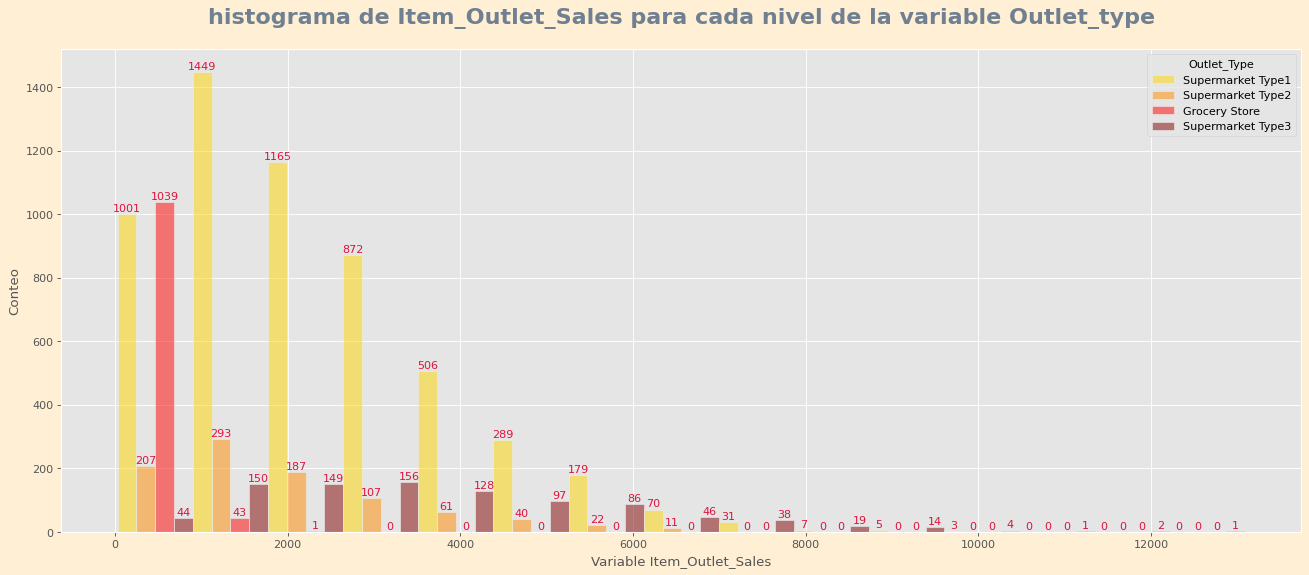

In [78]:
fig = plt.figure(figsize=(20,8), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
ax = sns.histplot(
    x ='Item_Outlet_Sales', 
    data = data, 
    hue='Outlet_Type',
    bins=bins, 
    color='#FFD700', 
    alpha=0.5, 
    legend=True,
    kde=False, multiple="dodge", fill=True,
    palette=['#FFD700', '#FF8C00', '#FF0000', '#800000']
    )
plt.title('histograma de Item_Outlet_Sales para cada nivel de la variable Outlet_type', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Variable Item_Outlet_Sales')
plt.ylabel('Conteo')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}\n',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', color='crimson')

plt.show()

In [95]:
frecuency = data['Item_Outlet_Sales'].value_counts(bins=bins).to_frame( name='Frecuencia')
frecuency

,Frecuencia
"(33.289, 903.535]",2291
"(903.535, 1773.78]",1935
"(1773.78, 2644.025]",1502
"(2644.025, 3514.27]",1135
"(3514.27, 4384.515]",695
"(4384.515, 5254.76]",426
"(5254.76, 6125.005]",287
"(6125.005, 6995.25]",127
"(6995.25, 7865.495]",69
"(7865.495, 8735.74]",26
